# Construction d'un neurone

On commence par construire un neurone simple, qu'on va ensuite tester. Je m'inspire beaucoup de l'exemple donné par [Miximum](https://www.miximum.fr/blog/introduction-au-deep-learning-1/).

J'utilise une classe définissant un objet neurone, qui aura:
- un constructeur (nommé classiquement `__init__`), 
- une méthode d'activation 
- une méthode de mise à jour les poids des neurones qui lui sont connectés en amont. 

Dans cette première étape, l'activation du neurone consiste à faire la moyenne pondérée des signaux qui lui arrivent et de passer le résultat.

In [5]:
import numpy as np

class Neuron:
    def __init__(self, input_weights):
        """Initialisation des poids / biais avec des valeurs aléatoires."""
        self.weights = input_weights
        
    def activation(self, X):
        """On suppose que X est de la taille passée dans le constructeur."""
        return np.average(X, weights= self.weights)
    
    def update_weights(self, input_weights):
        """ mise à jour des poids """
        self.weights = input_weights

Le neurone sera testé en lui demandant de distinguer deux entrées qui sont radicalement différentes : `Input1` et `Input2`.

In [6]:
n = 10
nb_zeros = 5
Uns = np.zeros(nb_zeros)
Zeros = np.ones(n - nb_zeros)
Input1 =  np.concatenate((Uns, Zeros))
Input1

array([0., 0., 0., 0., 0., 1., 1., 1., 1., 1.])

In [7]:
Input2 = np.concatenate((Zeros, Uns))
Input2

array([1., 1., 1., 1., 1., 0., 0., 0., 0., 0.])

Je veux que mon neurone renvoie 1 avec `Input` et 0 avec `Input1`.

L'objectif sera de trouver les bons adéquats pour que la sortie du neurone corresponde à cette reconnaissance recherchée. Le sujet est simple et je peux directement deviner les poids qui fonctionneront bien.

In [8]:
Weight = np.concatenate((Uns, Zeros))
Weight

array([0., 0., 0., 0., 0., 1., 1., 1., 1., 1.])

Je construis maintenant mon neurone avec la classe définit précédement. Je me souviens que pour cela, le constructeur `__init__` demande de donner le nombre de neurones connectés en amont, donc ici mes `n` entrées.

In [9]:
mon_neurone = Neuron(Weight)
res = mon_neurone.activation(Input1)
print(f'{res*100:.2f}%')

100.00%


In [10]:
res = mon_neurone.activation(Input2)
print(f'{res*100:.2f}%')

0.00%


La reconnaissance est parfaite, mais le cas était bien sûr bien trop simple.

# Rendre l'entrée plus visuelle

Les principes de base étant compris, j'améliore l'entrée pour qu'elle soit plus visuelle : je demande de reconnaître deux images radicalement différente. Pour rester simple, je prends une matrice 12x12 qui contient doinc 144 points. L'extension [matplotlib.pyplot](https://matplotlib.org/stable/tutorials/introductory/quick_start.html) propose la commande [imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) pour afficher des matrices de points.

Comme image je choisi simplement de mettre la moitié inférieur en blanc (avec des 1), la moitié supérieure restant noire. Pour construire mon image, j'utilise les techniques de remplissage rapide sur les vecteurs Numpy données dans le fichier [01_numpy.ipynb](../02_std_ext/01_numpy.ipynb). Ensuite, on passe d'un vecteur de 144 points à une matrice de 12x12 en utilisant la commande [numpy.reshape](https://www.w3schools.com/python/numpy/numpy_array_reshape.asp).

(-0.5, 11.5, 11.5, -0.5)

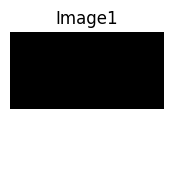

In [11]:
nb_points = 144
Zeros = np.zeros(nb_points//2)   # attention, bien utiliser la division d'entiers
Ones = np.ones(nb_points - nb_points // 2)

Input1 = np.concatenate((Zeros, Ones))
Matrice1 = np.reshape(Input1, (12, 12))

import matplotlib.pyplot as plt

plt.figure(figsize=(2,2))
plt.imshow(Matrice1, cmap="gray")
plt.title('Image1')
plt.axis("off")

Pour la deuxième image à distinguer, qui sera donc `Input2`, je choisis de mettre en blanc la partie supérieure de l'image.

(-0.5, 11.5, 11.5, -0.5)

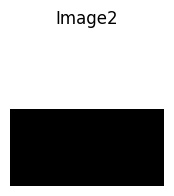

In [12]:
Input2 = np.concatenate((Ones, Zeros))
Matrice2 = np.reshape(Input2, (12, 12))

import matplotlib.pyplot as plt

plt.figure(figsize=(2,2))
plt.imshow(Matrice2, cmap="gray")
plt.title('Image2')
plt.axis("off")

Pour distinguer `Image1` d'`Image2`, je peux facilement deviner les poids qu'il faut utiliser.

In [13]:
Weight = Input1

Avec ce poids, je suis sûr d'obtenir 1 avec `Input1` et 0 avec `Input2`.

In [14]:
# on aplatit la matrice de poids
mon_neurone = Neuron(Weight)
mon_neurone.activation(Input1)

1.0

In [15]:
mon_neurone.activation(Input2)

0.0

Sur ces deux cas élémentaires, j'ai une distinction parfaite.

# Rendre l'entrée moins simple

Le cas précédant était trop simple pour montrer l'intérêt du neurone. J'introduit maintenant du bruit dans les deux entrées.

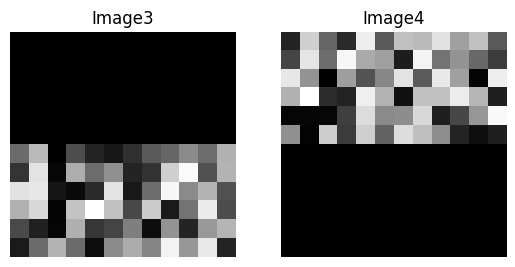

In [16]:
rng = np.random.RandomState(seed=1)
Ones = rng.random(nb_points - nb_points // 2)
Input3 = np.concatenate((Zeros, Ones))

Ones = rng.random(nb_points - nb_points // 2)
Input4 = np.concatenate((Ones, Zeros))

plt.subplot(1,2, 1)
plt.imshow(np.reshape(Input3,(12,12)), cmap="gray")
plt.axis("off")
plt.title("Image3")

plt.subplot(1,2, 2)
plt.imshow(np.reshape(Input4,(12,12)), cmap="gray")
plt.axis("off")
plt.title("Image4")

plt.show()


J'essaye toujours d'appliquer la distinction faite par le neurone pour ces deux images différentes.

In [17]:
mon_neurone = Neuron(Weight)
res = mon_neurone.activation(Input3)
print(f'{res*100:.2f}%')

45.89%


In [18]:
res = mon_neurone.activation(Input4)
print(f'{res*100:.2f}%')

0.00%


Sans trop de surprise la reconnaissance sur la zone bruitée est moins bonne. Mais c'est typiquement là qu'on peut utiliser La fonction [sigmoïde](02_regression_logistique.ipynb), car elle va aider à passer outre ce bruit et établir toujours une reconnaissance entre deux choix de manière plus tranchée. Nous introduisons donc cette fonction à l'intérieur de notre neurone.

In [19]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

Les poids doivent aussi être modifiés, car la fonction Sigmoïde demande une entrée entre $-\infty$ et $+\infty$. Je ne donne donc plus des poids à 0 ou 1 mais à -1 ou 1 selon la zone que je veux reconnaître. Ces choix de poids sont faits pour aller directement à un résultat pertinnent. Dans le chapitre suivant nous allons voir comment construire un algorithme qui retrouve ces *poids pertinents*.

In [20]:
Weight = np.concatenate((np.ones(72)*-1, np.ones(72)))

In [27]:
class Neuron2:
    def __init__(self, input_weights):
        """Initialisation des poids / biais avec des valeurs aléatoires."""
        self.weights = input_weights
        
    def activation(self, X):
        """On suppose que X est de la taille passée dans le constructeur."""
        agregation = np.dot(self.weights, X)  # produit scalaire
        return sigmoid(agregation)
    
    def update_weights(self, input_weights):
        """ mise à jour des poids """
        self.weights = input_weights

In [25]:
mon_neurone2 = Neuron2(Weight)
res = mon_neurone2.activation(Input3)
print(f'{res*100:.2f}%')

100.00%


In [26]:
res = mon_neurone2.activation(Input4)
print(f'{res*100:.2f}%')

0.00%


Dans un cas plus complexe (et plus proche de la réalité de nos perception), la fonction Sigmoïde aide à faire la distinction entre deux zones, même si l'une des zones a été floutée.

# Vers un apprentissage automatique

L'objectif d'un apprentissage automatique est de construire un algorithme permettant de trouver automatiquement les poids à utiliser en fonction des images qui lui sont soumises et du résultat qu'on veut en obtenir.

Ici nous avons quatres images et nous voulons les classer ainsi :
- Image1, Image2 : le résultat doit être vrai, ou 100%
- Image2, Image4 : le résultat doit être faux, ou 0%

Dans un premier temps nous allons paramétrer le nombre de lectures pour "apprendre". Dans un véritable algorithme, il faudrait paraméter l'algorithme en fonction de la précision de la reconnaissance qu'on recherche.

Pour cette algorithme, on peut se souvenir de la méthode de la [regression logistique](02_regression_logistique.ipynb) que nous avons faite dans une autre présentation. Pour espérer avoir un résultat, il faut se donner une règle pour aller *dans le bonne direction* et une bonne méthode est de se ramener à une descente de gradient.